# Episode 2: Credit Scoring Model in Python


📺 Watch the full tutorial series on YouTube:  
[**Build FinTech ML Projects with Python (Intro Episode)**](https://youtu.be/Qs5Jtaxl7Lc)

[**Build FinTech ML Projects with Python (Credit Scoring Model)**](https://youtu.be/pWOoYpJsaDc)

## What is Credit Scoring?

Credit scoring is one of the most widely used machine learning applications in finance. It helps institutions assess the creditworthiness of individuals using data-driven methods.


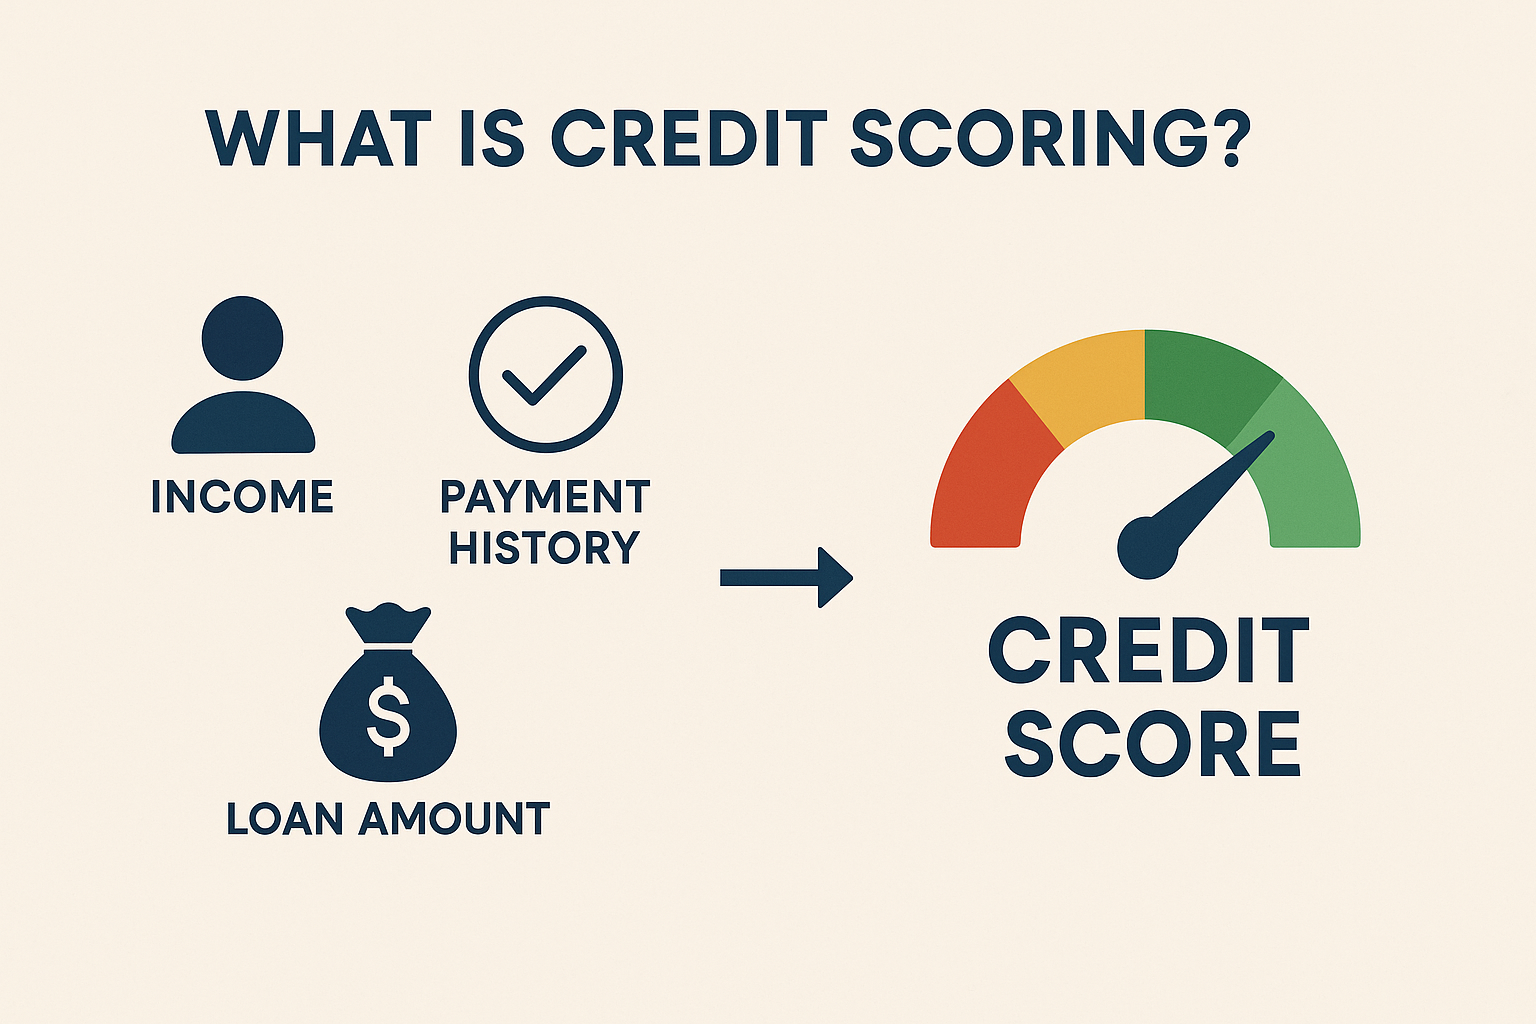

### Objective of the Tutorial
- In this tutorial, you will learn how to build a credit scoring classification model using Python and popular machine learning libraries.
- We will guide you through a complete data science pipeline that mirrors real-world financial modeling processes.

### What You Will Learn
You will gain hands-on knowledge in the following areas:

📌 Data Preparation
- Identifying and handling missing values effectively

- Performing exploratory data analysis (EDA) to uncover data insights

- Visualizing patterns in credit behavior using plots and charts

📌 Feature Engineering
- Creating meaningful features from raw data
- Converting categorical variables and handling skewed distributions

📌 Model Building

- Using pipelines to train and evaluate three classification algorithms:
    - Logistic Regression
    - Decision Tree
    - Random Forest


📌 Feature Scaling
- Standardizing features to improve model performance

📌 Model Evaluation

- Assessing models using accuracy, precision, recall, and F1-score

- Interpreting classification results in a business context

### Why This Tutorial Matters

- Credit scoring is a critical application in the finance and lending industry.

- Understanding the relationship between credit history and loan default helps design better risk mitigation strategies.

- This project teaches you how to apply machine learning in a regulated, high-stakes environment.

### Tools and Libraries Used

- Pandas for data manipulation

- Matplotlib & Seaborn for visualization

- Scikit-learn for preprocessing, modeling, and evaluation

### Target Audience

- This tutorial is ideal for:

    - Beginners and intermediate Python users

    - Aspiring data scientists

    - Professionals looking to understand ML in finance



## Let’s get started.

Dataset overview
- we will be using simplified version of the loan dataset
- such as `income, loan_amount, term, credit_history, and defaulted`

## Step 1: Load the dataset

### Download dataset from google drive

In [34]:
# To install gdown, uncomment below line and run the cell
#%pip install gdown

In [35]:
import gdown
# File ID from Google Drive share link
file_id = '1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG'

url = f'https://drive.google.com/uc?id={file_id}'

output = '../data/loan_data.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG
To: /home/noh/Desktop/AI Projects/fintech-ml-labs/data/loan_data.csv
100%|██████████| 52.4k/52.4k [00:00<00:00, 2.07MB/s]


'../data/loan_data.csv'

In [63]:
import pandas as pd
# Load the dataset
df = pd.read_csv('../data/loan_data.csv')

# Explore the first few rows
df.head()

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0


## Step 2: Understand the data type and shape of the dataset

- use `df.shape`

In [37]:
df.shape

(1248, 5)

- use `dtypes`

In [38]:
df.dtypes

income            float64
loan_amount       float64
term                int64
credit_history    float64
defaulted           int64
dtype: object

## Step 3: Preprocessing data

1. Check for missing values

- use `isnull().sum()` function to check missing values

In [39]:
df.isnull().sum()

income            120
loan_amount       122
term                0
credit_history    112
defaulted           0
dtype: int64

2. Mean or Median Imputation
- Handle missing values in numerical features using median imputation
- use `.fillna()` function

In [64]:
df.fillna({'income':df['income'].median()}, inplace=True)
df.fillna({'loan_amount':df['loan_amount'].median()}, inplace=True)

- Handle missing values in categorical feature using mode imputation

In [65]:
df.fillna({'credit_history':df['credit_history'].mode()[0]}, inplace=True)

- Verify that missing values are handled

In [66]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

3. Summary statistics

- use `describe()` to see the summary statistics of the data

In [67]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


## Step 4: Data Visualization

1. Distribution of Numerical Features

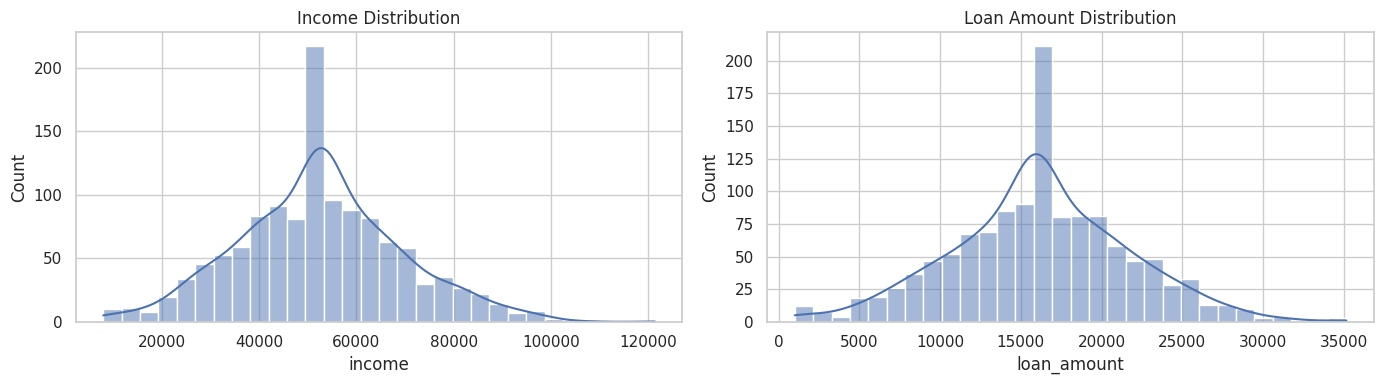

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Income Distribution")

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

2. Loan Term count plot

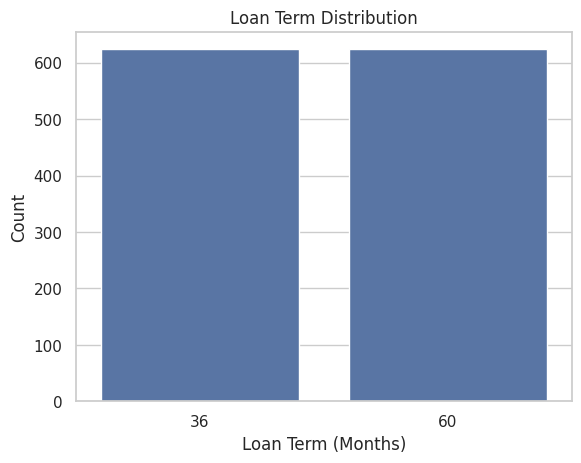

In [44]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()

3. Credit History vs Defaulted

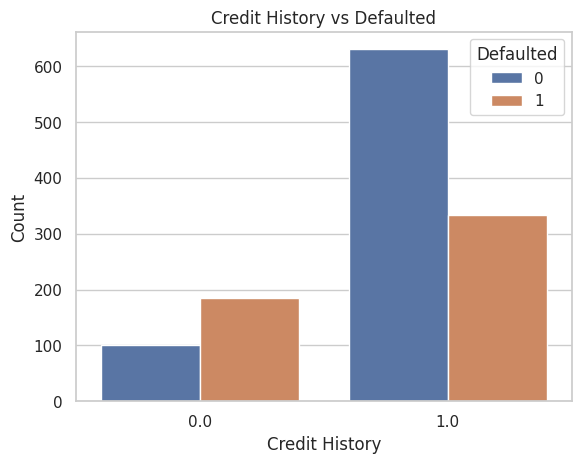

In [45]:
sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title("Credit History vs Defaulted")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title='Defaulted')
plt.show()

4. Correlation Heatmap

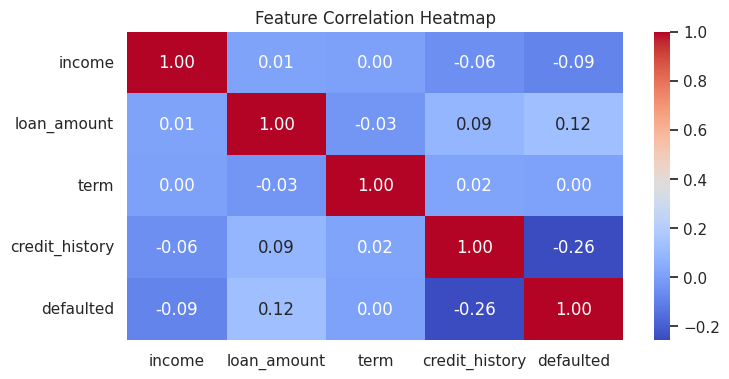

In [46]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 5: Feature Engineering

1. Convert Categorical Features

In [68]:
# Binary encoding: 0 for 36 months, 1 for 60 months
df['term_binary'] = df['term'].apply(lambda x: 1 if x == 60 else 0)

2. Create Derived Features (Optional but insightful)

You can create new features that may capture more complex patterns:

In [69]:
import numpy as np
# Log-transform skewed features
df['log_income'] = np.log1p(df['income'])
df['log_loan_amount'] = np.log1p(df['loan_amount'])


3. Feature Selection

Final set of features for modeling:

In [49]:
# let's first see the features
list(df.columns)

['income',
 'loan_amount',
 'term',
 'credit_history',
 'defaulted',
 'term_binary',
 'log_income',
 'log_loan_amount']

In [70]:
features = ['log_income', 'log_loan_amount', 'term_binary', 'credit_history']
target = 'defaulted'


## Step 6: Model Training

1. Feature Scaling

- use `StandardScaler` from `sklearn`

In [73]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Define scaling features
scale_features = ['log_income', 'log_loan_amount']
# Fit the scaler to our dataset
df[scale_features] = scaler.fit_transform(df[scale_features])

df.head()

,income,loan_amount,term,credit_history,defaulted,term_binary,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,-2.844410


2. Train Test Split
- use an 80-20 split—`80%` for training and `20%` for testing using Scikit-learn’s `train_test_split` function

In [79]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



3. Build Model Pipeline

To build and evaluate our credit scoring model, we will use three different classification algorithms:

- **Logistic Regression** for its interpretability and baseline performance.

- **Decision Tree Classifier** for its ability to capture non-linear relationships.

- **Random Forest Classifier** for robustness and improved generalization.

We will use Scikit-learn’s Pipeline to streamline model creation, training, and prediction. This ensures our workflow remains clean and modular.

In [75]:
# Import Required classess from sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [80]:
#  Define Classifier Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [81]:
# Train and Evaluate Each Model

for name, model in models.items():
    # Display the Current Model Name

    print(f"\nModel: {name}")
    
    # Build pipeline (scaling already applied to X)
    pipeline = Pipeline([
        # You can specify the StandardScaler() if not,
        ('classifier', model)
    ])
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Make Prediction
    y_pred = pipeline.predict(X_test)
    
    # Evaluate model accuracy
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    


Model: Logistic Regression
Accuracy: 0.6680
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       143
           1       0.69      0.40      0.51       107

    accuracy                           0.67       250
   macro avg       0.68      0.63      0.63       250
weighted avg       0.67      0.67      0.65       250


Model: Decision Tree
Accuracy: 0.5320
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.45      0.42      0.43       107

    accuracy                           0.53       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.53      0.53      0.53       250


Model: Random Forest
Accuracy: 0.6080
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       143
           1       0.55      0.49      0.51  

✅ Recommendation
- Logistic Regression currently provides the best balance between simplicity and predictive power on this dataset.

- However, recall on defaulters is low for all models. Since missing defaulters can be costly in credit scoring, you may need to:

    - Try resampling techniques (e.g., SMOTE, class weighting).

    - Perform hyperparameter tuning.

    - Explore other classifiers (e.g., XGBoost, LightGBM).

    - Use threshold adjustment to favor identifying more defaulters.